In [1]:
word = 'Python'
print(word[0])
print(word[5])
print(word[-1])
print(word[-2])
print(word[-6])
print(word[0:2])
print(word[2:5])
print(word[:2])
print(word[4:])
print(word[-2:])
print(word[:2])
print(word[:4])

P
n
n
o
P
Py
tho
Py
on
on
Py
Pyth


[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
[4.   2.56 1.44 0.64 0.16 0.   0.16 0.64 1.44 2.56 4.  ]


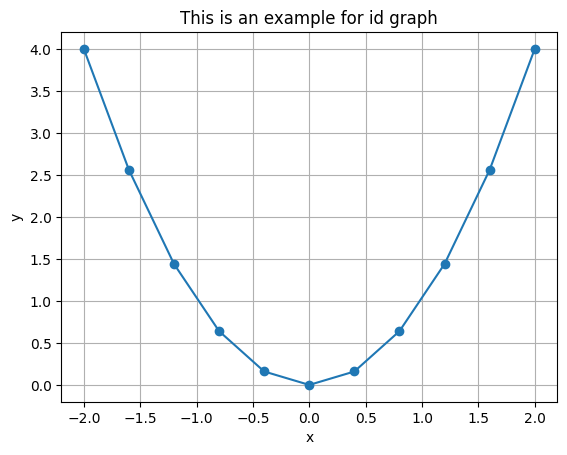

In [2]:
import numpy as np
import matplotlib.pylab as plt

x = np.linspace(-2, 2, 11)
f = lambda x: x**2
fx = f(x)
print(x)
print(fx)

plt.plot(x, fx, '-o')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('This is an example for id graph')
plt.show()

In [3]:
import numpy as np
import matplotlib.pylab as plt
x = np.linspace(-2, 2, 11)
y = np.linspace(-2, 2, 11)

print(x)
print(y)

x,y = np.meshgrid(x, y)
print(x)
print(y)

f = lambda x, y : (x-1)**2 + (y-1)**2
z = f(x, y)
print(z)

[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
[[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]]
[[-2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2. ]
 [-1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6]
 [-1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2]
 [-0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8]
 [-0.4 -0.4 -0.

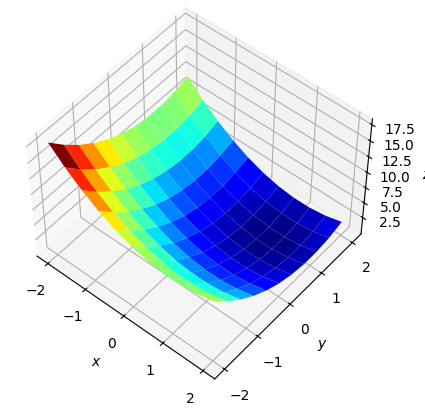

In [7]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.axes(projection='3d', elev=50, azim=-50)
ax.plot_surface(x, y, z, cmap=plt.cm.jet)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

plt.show()

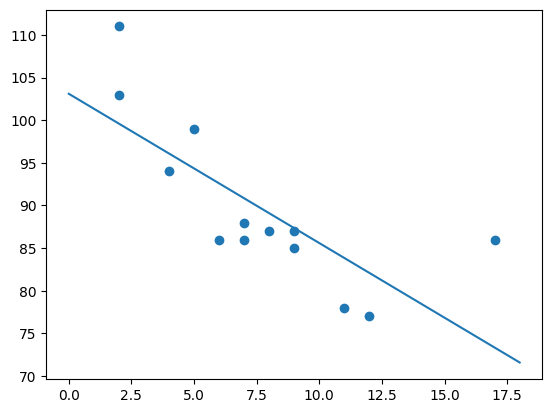

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
y = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

xx=np.linspace(0, 18, 180)
yy=slope * xx + intercept

plt.scatter(x, y)
plt.plot(xx, yy)
plt.show()

In [22]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def numerical_derivative(f, x):
    delta_x=1e-4
    gradf=np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

    while not it.finished:
        idx=it.multi_index
        tmp_val=x[idx]
        x[idx]=float(tmp_val)+delta_x
        fx1=f(x)

        x[idx]=float(tmp_val)-delta_x
        fx2=f(x)
        gradf[idx]=(fx1-fx2)/(2*delta_x)

        x[idx]=tmp_val
        it.iternext()
    return gradf

class logicGate:
    def __init__(self, gate_name, xdata, tdata, learning_rate=0.01, threshold=0.5):
        self.name=gate_name

        self.__xdata=xdata.reshape(4, 2)
        self.__tdata=tdata.reshape(4, 1)

        self.__w=np.random.rand(2, 1)
        self.__b=np.random.rand(1)

        self.__learning_rate=learning_rate
        self.__threshold=threshold

    def __loss_func(self):
        delta=1e-7

        z=np.dot(self.__xdata, self.__w) + self.__b
        y=sigmoid(z)

        return -np.sum(self.__tdata * np.log(y + delta) + (1 - self.__tdata) * np.log(1 - y) + delta)

    def err_val(self):
        delta = 1e-7

        z=np.dot(self.__xdata, self.__w) + self.__b
        y=sigmoid(z)

        return -np.sum(self.__tdata * np.log(y + delta) + (1 - self.__tdata) * np.log(1 - y) + delta)
    def train(self):

        f=lambda x : self.__loss_func()

        print("init error : ", self.err_val())

        for stp in range(20000):
            self.__w -= self.__learning_rate * numerical_derivative(f, self.__w)
            self.__b -= self.__learning_rate * numerical_derivative(f, self.__b)

            if (stp % 2000 == 0):
                print("step : ", stp, "error : ", self.err_val())

    def predict(self, input_data):

        z=np.dot(input_data, self.__w) + self.__b
        y=sigmoid(z)

        if y[0] > self.__threshold:
            result = 1
        else:
            result = 0

        return y, result

In [23]:
xdata=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata=np.array([[1, 1, 1, 0]])

AND_gate=logicGate("AND_GATE", xdata, tdata)
AND_gate.train()

for in_data in xdata:
    (sig_val, logic_val)=AND_gate.predict(in_data)
    print(in_data, " : ", logic_val)

init error :  2.9174247429962974
step :  0 error :  2.9102289097324645
step :  2000 error :  0.6840571269492668
step :  4000 error :  0.3986716719672868
step :  6000 error :  0.2791443782131776
step :  8000 error :  0.21378792271195524
step :  10000 error :  0.17279371866712812
step :  12000 error :  0.14477377109747774
step :  14000 error :  0.12445408956319877
step :  16000 error :  0.1090661541710887
step :  18000 error :  0.0970209322641528
[0 0]  :  1
[0 1]  :  1
[1 0]  :  1
[1 1]  :  0


In [25]:
xdata=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata=np.array([[1, 0, 0, 0]])

AND_gate=logicGate("AND_GATE", xdata, tdata)
AND_gate.train()

for in_data in xdata:
    (sig_val, logic_val)=AND_gate.predict(in_data)
    print(in_data, " : ", logic_val)

init error :  3.8079119778520862
step :  0 error :  3.7479282278507604
step :  2000 error :  0.43844909014582706
step :  4000 error :  0.23470450931203235
step :  6000 error :  0.1580874272319918
step :  8000 error :  0.11858856972738689
step :  10000 error :  0.09466087305543744
step :  12000 error :  0.07866817590736706
step :  14000 error :  0.06724715887342027
step :  16000 error :  0.058693100615143205
step :  18000 error :  0.0520522285558835
[0 0]  :  1
[0 1]  :  0
[1 0]  :  0
[1 1]  :  0


In [34]:
def f(x):
    return x**2 - 4*x + 6

def grad_fx(x):
    return 2*x - 4

def steepest_descent(func, grad_func, x0,  learning_rate = 0.01, Maxiter=10, verbose = True):
    paths = []
    for i in range(Maxiter):
        x1 = x0 - learning_rate * grad_func(x0)
        if verbose:
            print('{0:03d} : {1:4.3f}, {2:4.2E}'.format(i, x1, func(x1)))
        x0 = x1
        paths.append(x0)
    return (x0, func(x), paths)
xopt, fopt, paths = steepest_descent(f, grad_fx, 0.0, learning_rate=1.2)

000 : 4.800, 9.84E+00
001 : -1.920, 1.74E+01
002 : 7.488, 3.21E+01
003 : -5.683, 6.10E+01
004 : 12.756, 1.18E+02
005 : -13.059, 2.29E+02
006 : 23.083, 4.46E+02
007 : -27.516, 8.73E+02
008 : 43.322, 1.71E+03
009 : -55.851, 3.35E+03


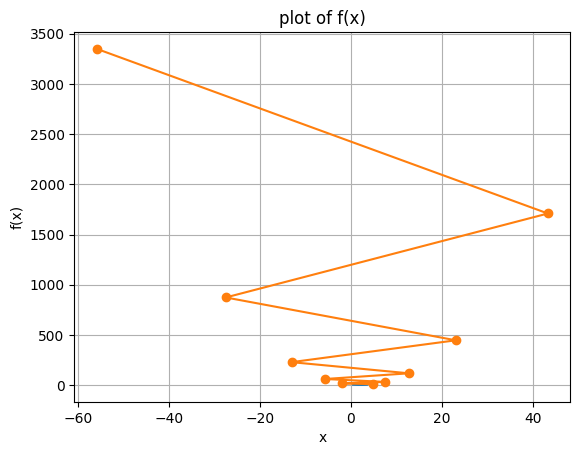

In [37]:
x = np.linspace(0.5, 3.5, 1000)
paths = np.array(paths)
plt.plot(x, f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

000 : 1.200, 2.64E+00
001 : 2.640, 2.41E+00
002 : 1.488, 2.26E+00
003 : 2.410, 2.17E+00
004 : 1.672, 2.11E+00
005 : 2.262, 2.07E+00
006 : 1.790, 2.04E+00
007 : 2.168, 2.03E+00
008 : 1.866, 2.02E+00
009 : 2.107, 2.01E+00


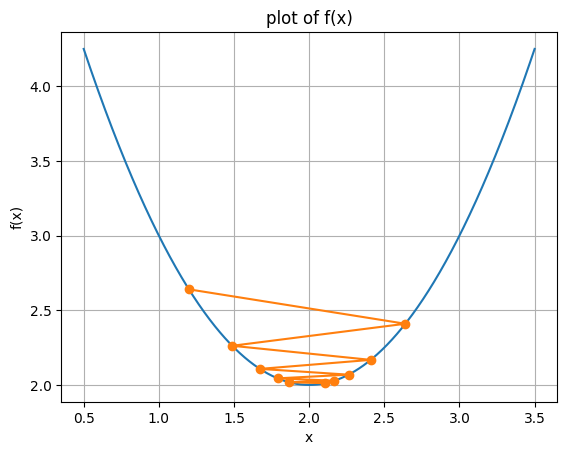

In [38]:
xopt, fopt, paths = steepest_descent(f, grad_fx, 3.0, learning_rate=0.9)

x = np.linspace(0.5, 3.5, 1000)
paths = np.array(paths)
plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

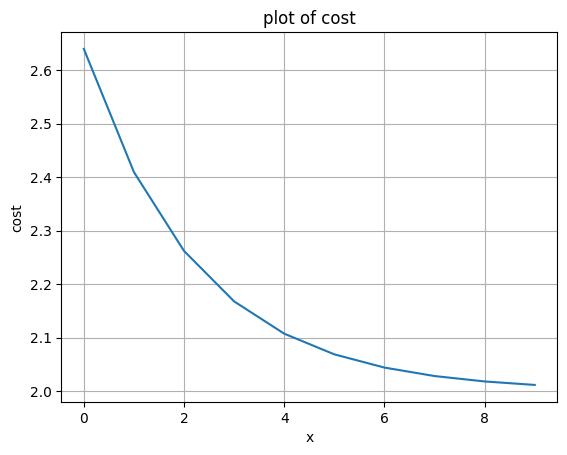

In [39]:
plt.plot(f(paths))
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

[2. 2.] [[2.]
 [2.]]


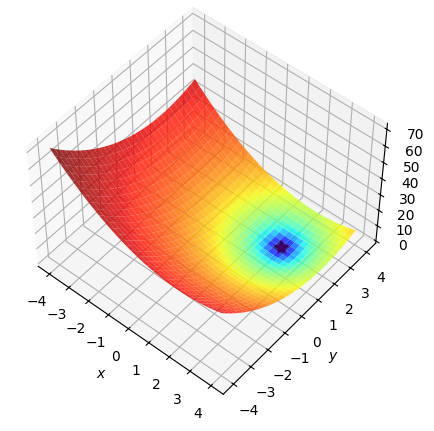

/home/park/.venv/visualize.py:18: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap=plt.cm.jet)


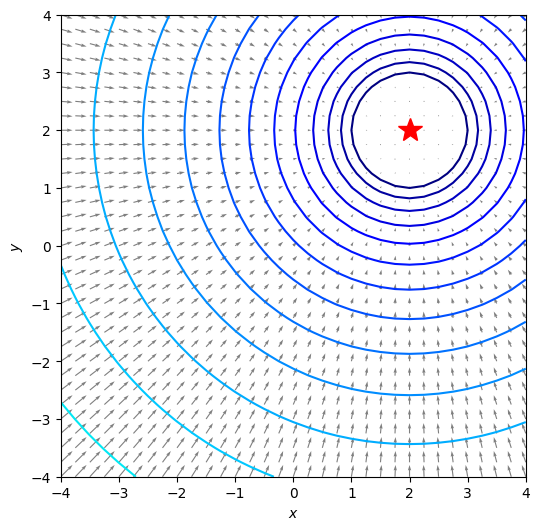

/home/park/.venv/visualize.py:41: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap=plt.cm.jet)


0 [0. 0.] 8.0
1 [1. 1.] 2.0
2 [1.5 1.5] 0.5
3 [1.75 1.75] 0.125
4 [1.875 1.875] 0.03125
5 [1.9375 1.9375] 0.0078125
6 [1.96875 1.96875] 0.001953125
7 [1.984375 1.984375] 0.00048828125
8 [1.9921875 1.9921875] 0.0001220703125
9 [1.99609375 1.99609375] 3.0517578125e-05


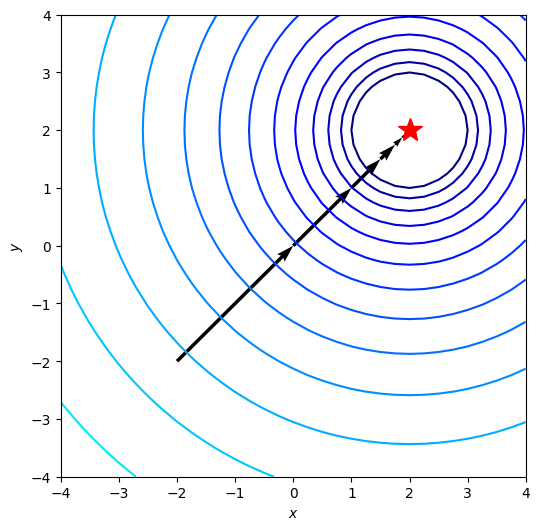

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from visualize import contour_with_quiver
from visualize import contour_with_path
from visualize import surf

xmin, xmax, xstep = -4.0, 4.0, .25
ymin, ymax, ystep = -4.0, 4.0, .25

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

f = lambda x, y : (x-2)**2 + (y-2)**2
z = f(x, y)
minima = np.array([2., 2.])

f(*minima)

minima_ = minima.reshape(-1, 1)
print(minima, minima_)
surf(f, x, y, minima=minima_)

grad_f_x = lambda x, y: 2 * (x-2)
grad_f_y = lambda x, y: 2 * (y-2)

contour_with_quiver(f, x, y, grad_f_x, grad_f_y, minima=minima_)

def steepest_descent_twod(func, gradx, grady, x0, Maxiter=10, learning_rate=0.25, verbose=True):
    paths = [x0]
    fval_paths = [f(x0[0], x0[1])]
    for i in range(Maxiter):
        grad = np.array([grad_f_x(*x0), grad_f_y(*x0)])
        x1 = x0 - learning_rate * grad
        fval = f(*x1)
        if verbose:
            print(i, x1, fval)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

x0 = np.array([-2., -2.])
xopt, fopt, paths, fval_paths = steepest_descent_twod(f, grad_f_x, grad_f_y, x0)

contour_with_path(f, x, y, paths, minima=np.array([[2], [2]]))

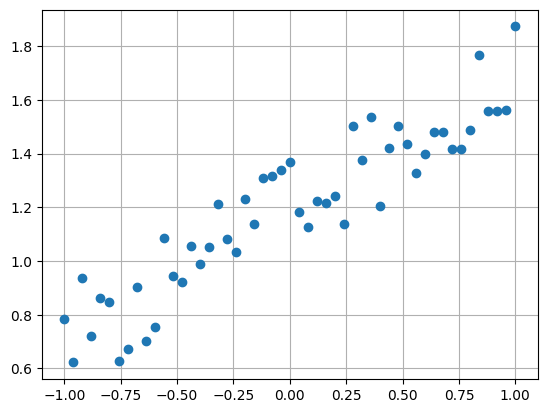

In [50]:
import numpy as np
import matplotlib.pylab as plt

np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
f = lambda x: 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))
plt.plot(x_train, y_train, 'o')
plt.grid()
plt.show()

np.random.seed(303)
shuffled_id =np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
x_train = x_train[shuffled_id]
y_train = y_train[shuffled_id]

def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 * (w[0] * x_set[i] + w[1] - y_set[i] )**2
    return val / N

def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0] * x_set[i] + w[1] -y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

def generate_batches(batch_size, features, labels):

    assert len(features) == len(labels)
    outout_batches = []

    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)

    return outout_batches

0 [ 4. -1.] 4.579314993864028
10 [3.36748902 0.05509539] 2.114661863449622
20 [2.85966989 0.6217412 ] 1.163370846765917
30 [2.4470799  0.92319527] 0.7232771480224915
40 [2.10909494 1.08113942] 0.4806179088890847
50 [1.83067577 1.16181581] 0.3296288926560264
0 [ 4. -1.] 4.579314993864028
10 [0.83302959 1.20678435] 0.03003201597220386
20 [0.4684414 1.2013792] 0.006758172467077168
30 [0.46435817 1.19757988] 0.0067419444174559254
40 [0.46490866 1.19741605] 0.006741085572109452
50 [0.46493098 1.19741456] 0.006741066002074992


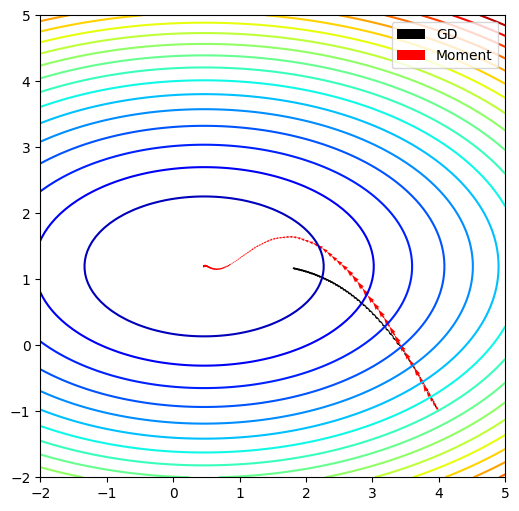

In [51]:
batch_size = 10
lr = 0.01
MaxEpochs = 51

alpha = .9

w0 = np.array([4.0, -1.0])
path_sgd = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        w1 = w0 - lr * grad
        w0 = w1

w0 = np.array([4.0, -1.0])
path_mm = []
velocity = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_mm.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        velocity = alpha * velocity - lr * grad
        w1 = w0 + velocity
        w0 = w1

w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0 *0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        lossw[i, j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6, 6))

ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()),20))
paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

paths = path_mm
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['GD', 'Moment'])
plt.show()

In [ ]:
MaxEpochs = 51
batch_size = 10

eosilon = 0.25
delta = 1e-6

